In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

image_dir = '/content/drive/MyDrive/Colab Notebooks/Images'
for filename in os.listdir(image_dir):
    if filename.endswith(('.jpg', '.png', '.jpeg')): # Filter for image files
        print(filename)

half_ripe_tomato.jpg
ripe_banana.jpg
ripe_tomato.jpg
unripe_banana.jpg
unripe_tomato.jpg
crack_1.jpg
fabric_3.jpg
metal.jpg
tablet.png
car_part.jpg
dry_solder.jpg
kitkat_correct_template.jpg
kitkat_false_logo.jpg
defected_bottle.jpg
annotated_output.jpg
annotated_bottle.jpg
pcb_9.jpg
Example  2.jpg
highresolution_gear.jpg


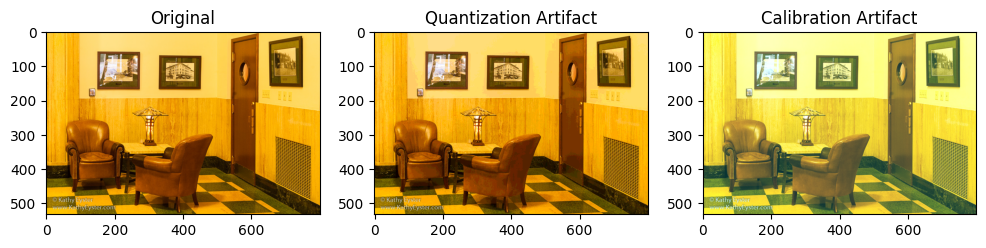

In [ ]:
#Assignment 2 - Industrial Vision
# 1) Analyze two real world examples where improper calibration or quantization causes visible artifacts.
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Images/Example  2.jpg')

cv2.imwrite('original_gradient.jpg', img)  # This saves your loaded image as 'original_gradient.jpg'

# Simulate quantization artifact (reduce to 4-bit, causing banding)
def simulate_quantization(img, levels=16):  # 4-bit = 16 levels
    return (np.round(img / 255.0 * (levels - 1)) / (levels - 1) * 255).astype(np.uint8)

quantized = simulate_quantization(img)
cv2.imwrite('quantized_banding.jpg', quantized)

# Simulate calibration artifact (color cast, e.g., yellow tint from improper white balance)
def simulate_color_cast(img, cast_color=(50, 50, 0)):  # Add yellow (R+G)
    cast_img = img.astype(np.int16) + np.array(cast_color)
    return np.clip(cast_img, 0, 255).astype(np.uint8)

cast = simulate_color_cast(img)
cv2.imwrite('color_cast.jpg', cast)

# Display for analysis
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)); axs[0].set_title('Original')
axs[1].imshow(cv2.cvtColor(quantized, cv2.COLOR_BGR2RGB)); axs[1].set_title('Quantization Artifact')
axs[2].imshow(cv2.cvtColor(cast, cv2.COLOR_BGR2RGB)); axs[2].set_title('Calibration Artifact')
plt.show()

Simulated dataset saved in simulated_dataset


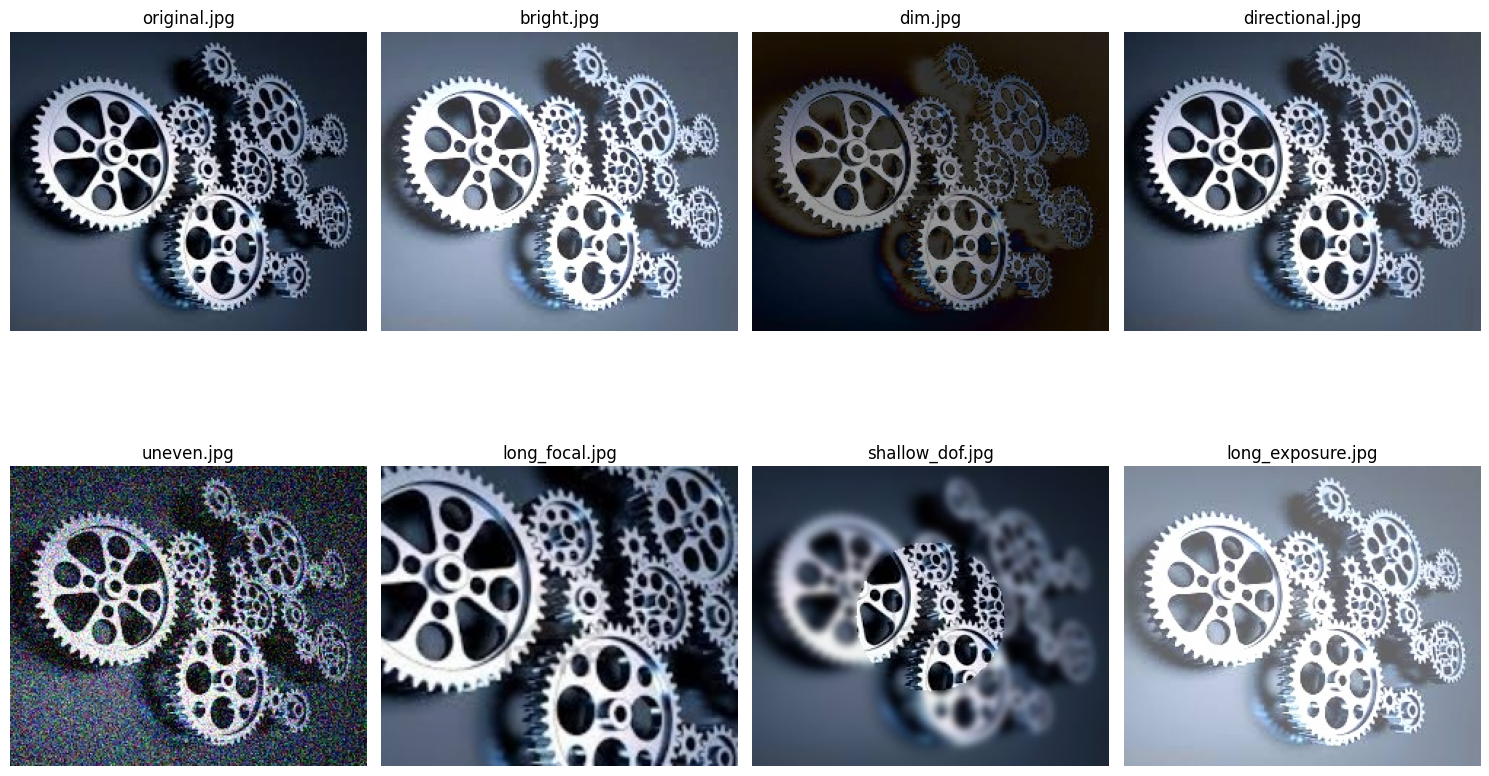

In [ ]:
# 2) Obtain or simulate an industrial dataset (e.g., machine parts, PCB boards, mechanical tools)
# captured under: Different lighting conditions (bright, dim, directional, uneven illumination) and Different lens parameters (focal length, aperture, exposure time).
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# Load input image (replace with your industrial image)
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Images/highresolution_gear.jpg')
if img is None:
    # Synthetic placeholder: a simple PCB-like image
    img = np.ones((400, 400, 3), dtype=np.uint8) * 200
    cv2.rectangle(img, (50, 50), (350, 350), (0, 0, 0), 2)
    cv2.putText(img, 'PCB Board', (100, 200), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

output_dir = 'simulated_dataset'
os.makedirs(output_dir, exist_ok=True)
cv2.imwrite(os.path.join(output_dir, 'original.jpg'), img)

# Lighting simulations (adjust brightness/contrast)
def adjust_lighting(img, brightness=0, contrast=1.0):
    return cv2.convertScaleAbs(img, alpha=contrast, beta=brightness)

# Bright
bright = adjust_lighting(img, brightness=50, contrast=1.2)
cv2.imwrite(os.path.join(output_dir, 'bright.jpg'), bright)

# Dim
dim = adjust_lighting(img, brightness=-50, contrast=0.8)
cv2.imwrite(os.path.join(output_dir, 'dim.jpg'), dim)

# Directional (simulate shadow on one side)
directional = img.copy()
gradient = np.linspace(0, 1, img.shape[1])
gradient = np.tile(gradient, (img.shape[0], 1))
# Expand gradient to 3 channels to match image
gradient = np.tile(gradient[:, :, np.newaxis], (1, 1, 3))
directional = cv2.addWeighted(img, 1, (gradient * 100).astype(np.uint8), 0.5, 0)
cv2.imwrite(os.path.join(output_dir, 'directional.jpg'), directional)

# Uneven illumination (add random noise mask)
uneven = img.copy().astype(np.int16) # Convert to signed integer type
mask = np.random.normal(0, 50, img.shape)
uneven = cv2.add(uneven, mask.astype(np.int16)) # Convert mask to match image type
uneven = np.clip(uneven, 0, 255).astype(np.uint8) # Clip and convert back to uint8
cv2.imwrite(os.path.join(output_dir, 'uneven.jpg'), uneven)

# Lens parameters
# Focal length (simulate FOV change: longer focal = narrower FOV via crop and resize)
def simulate_fov(img, scale=1.5):  # Narrower FOV (zoom in)
    h, w = img.shape[:2]
    cropped = img[int(h*(1-1/scale)/2):int(h*(1+1/scale)/2), int(w*(1-1/scale)/2):int(w*(1+1/scale)/2)]
    return cv2.resize(cropped, (w, h))

long_focal = simulate_fov(img, scale=1.5)
cv2.imwrite(os.path.join(output_dir, 'long_focal.jpg'), long_focal)

# Aperture/DOF (shallow DOF: blur background; assume center is focus)
def simulate_dof(img, blur_strength=15):
    mask = np.zeros_like(img)
    cv2.circle(mask, (img.shape[1]//2, img.shape[0]//2), min(img.shape[:2])//4, (255,255,255), -1)
    blurred = cv2.GaussianBlur(img, (blur_strength, blur_strength), 0)
    return np.where(mask == (255,255,255), img, blurred)

shallow_dof = simulate_dof(img)
cv2.imwrite(os.path.join(output_dir, 'shallow_dof.jpg'), shallow_dof)

# Exposure time (long exposure: brighter or motion blur; simulate simple brightness)
long_exposure = adjust_lighting(img, brightness=100)
cv2.imwrite(os.path.join(output_dir, 'long_exposure.jpg'), long_exposure)

print(f'Simulated dataset saved in {output_dir}')

# Load all generated images and display them
image_files = ['original.jpg', 'bright.jpg', 'dim.jpg', 'directional.jpg', 'uneven.jpg',
               'long_focal.jpg', 'shallow_dof.jpg', 'long_exposure.jpg']
images = [cv2.cvtColor(cv2.imread(os.path.join(output_dir, f)), cv2.COLOR_BGR2RGB) for f in image_files]

# Create a grid to display all images
n_images = len(images)
cols = 4  # Number of columns in the grid

# Calculate rows needed, ensuring at least one row if there are images
rows = (n_images + cols - 1) // cols if n_images > 0 else 0

if n_images > 0:
    fig, axs = plt.subplots(rows, cols, figsize=(15, 5*rows))
    axs = axs.flatten()  # Flatten the array of axes for easy iteration

    for i, (ax, img, title) in enumerate(zip(axs, images, image_files)):
        ax.imshow(img)
        ax.set_title(title)
        ax.axis('off')  # Hide axes

    # Hide any unused subplots
    for j in range(n_images, len(axs)):
        axs[j].axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("No images to display.")